<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Читаем-файлы" data-toc-modified-id="Читаем-файлы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Читаем файлы</a></span></li></ul></div>

# Импортируем библиотеки


In [61]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import xgboost as xgb

import os


# Читаем файлы

In [62]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
macro = pd.read_csv('./macro.csv')
id_test = test.id
train.sample(10)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [63]:
print(train.shape)

(30471, 292)


In [64]:
print(test.shape)

(7662, 291)


In [65]:
train.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_c

In [66]:
data = pd.read_csv('train.csv', parse_dates = ['timestamp'])
data.shape

(30471, 292)

In [67]:
X = data.drop(['price_doc'], axis = 1)
#удаляем колонку цена и делим на два файла 1 к 10 на тестовую и обучаемую выборку. y - цена.
y = data['price_doc']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.1, random_state = 42)

In [68]:
# очень много переменных, посмотрим главную из них - цена price_doc. 

<AxesSubplot:xlabel='price_doc'>

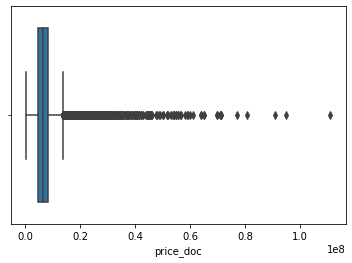

In [69]:
# Постоим график и посмотрим на переменную
sns.boxplot(x = y_train)

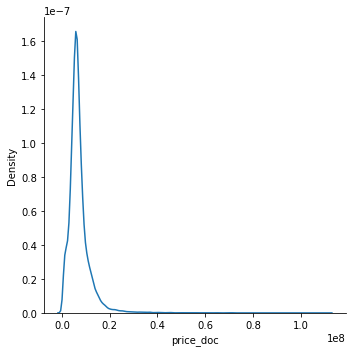

In [70]:
sns.displot(data = X_train, x = y_train, kind = 'kde')

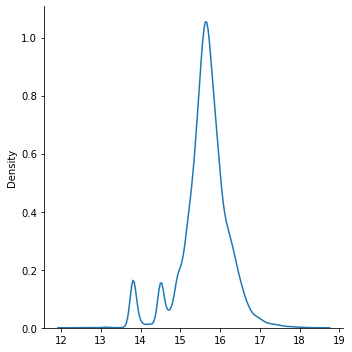

In [71]:
# так как необходимо использовать метрику RMSLE среднеквадратическую логарифмическую ошибку выполним логарифмирование
sns.displot(data = X_train, x = np.log(y_train.values), kind = 'kde')

In [72]:
# выведем столбец с датой
data['timestamp']

0       2011-08-20
1       2011-08-23
2       2011-08-27
3       2011-09-01
4       2011-09-05
           ...    
30466   2015-06-30
30467   2015-06-30
30468   2015-06-30
30469   2015-06-30
30470   2015-06-30
Name: timestamp, Length: 30471, dtype: datetime64[ns]

/Users/mariannavidmail.ru/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


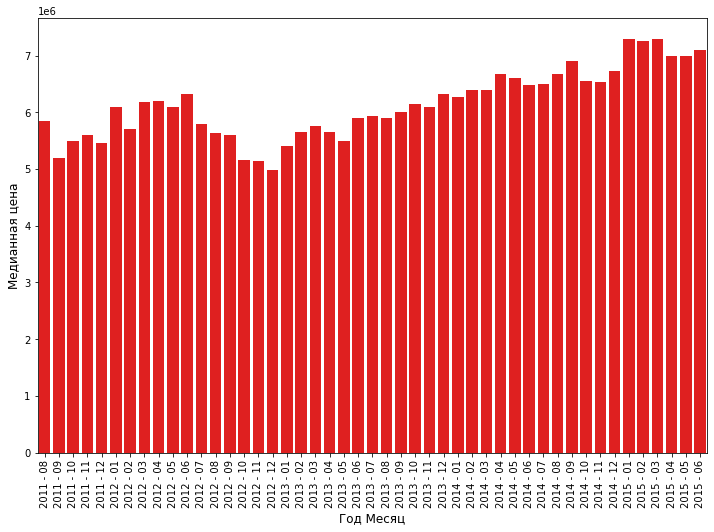

In [73]:
# Сделаем группировку по полю price_doc по месяцу и году и берем медиану и сбросим индекс (ставим 0,1,2,3).
# Нарисуем график зависимости цены-медианы в каждом месяце.
data['yearmonth'] = data['timestamp'].apply(lambda x: x.strftime('%Y - %m'))
grouped_data = data.groupby('yearmonth')['price_doc'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,8))
sns.barplot(grouped_data.yearmonth.values, grouped_data.price_doc.values,color='r', alpha=1)
plt.ylabel('Медианная цена', fontsize=12)
plt.xlabel('Год Месяц', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

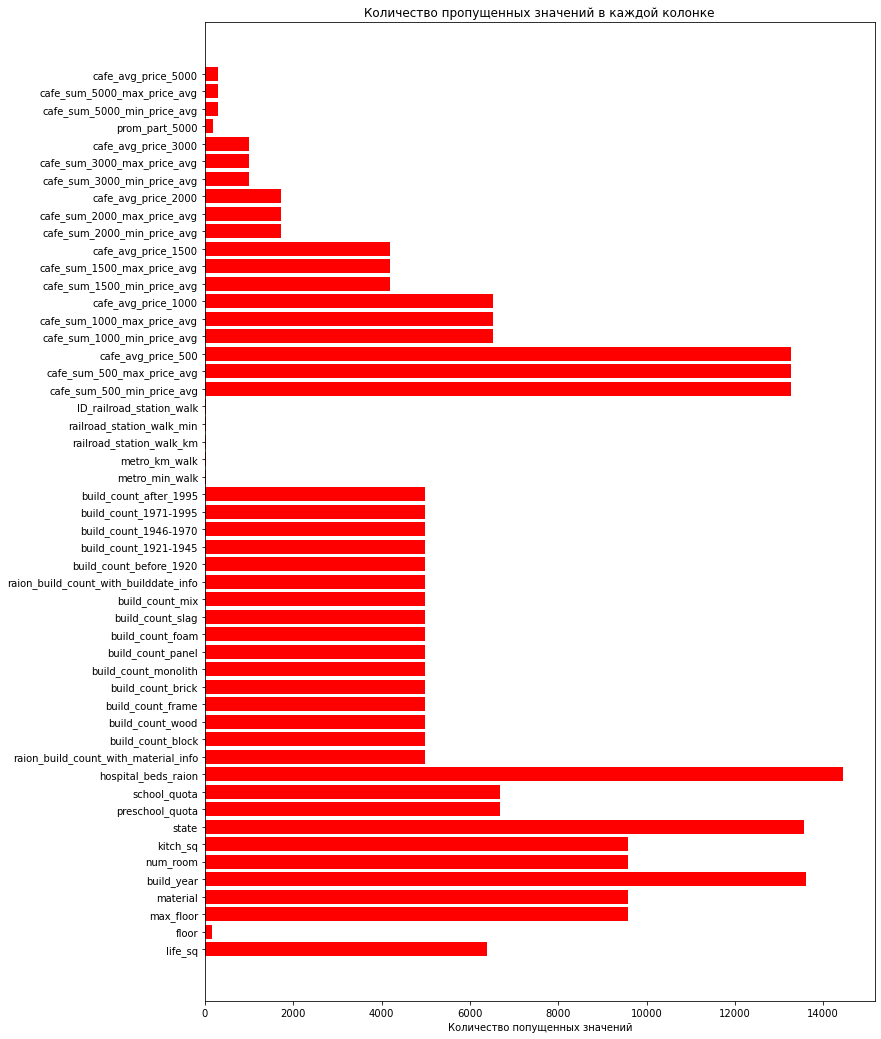

In [74]:
# Интересно сколько пропущенных значений Nan. 
missing_data = data.isnull().sum(axis = 0).reset_index()
missing_data.columns = ['column_name', 'missing_count']
missing_df = missing_data.loc[lambda df: df['missing_count'] > 0, :]
ind = np.arange(missing_df.shape[0]) # от 0 до stop
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='r')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Количество попущенных значений")
ax.set_title("Количество пропущенных значений в каждой колонке")
plt.show()

In [75]:
# Категориальные значения переведем в числовые с помощью LabelEncoder
for f in X_train.columns:
    if X_train[f].dtype=='object':
        print(f)
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(X_train[f].values.astype('str')) + list(X_test[f].values.astype('str')))
        X_train[f] = lbl.transform(list(X_train[f].values.astype('str')))
        X_test[f] = lbl.transform(list(X_test[f].values.astype('str')))


product_type
sub_area
culture_objects_top_25
thermal_power_plant_raion
incineration_raion
oil_chemistry_raion
radiation_raion
railroad_terminal_raion
big_market_raion
nuclear_reactor_raion
detention_facility_raion
water_1line
big_road1_1line
railroad_1line
ecology


In [76]:
# Пропущенные значения заменим на -99
X_train.fillna(-99, inplace=True)
X_test.fillna(-99, inplace=True)

/var/folders/nn/lgkpcrqd6rzc4kpwdjtpr6xh0000gn/T/ipykernel_29022/496211122.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  X_train["yearweek"] = X_train["timestamp"].dt.year*100 + X_train["timestamp"].dt.weekofyear
/var/folders/nn/lgkpcrqd6rzc4kpwdjtpr6xh0000gn/T/ipykernel_29022/496211122.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  X_test["yearweek"] = X_test["timestamp"].dt.year*100 + X_test["timestamp"].dt.weekofyear
/var/folders/nn/lgkpcrqd6rzc4kpwdjtpr6xh0000gn/T/ipykernel_29022/496211122.py:19: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  X_train["week_of_year"] = X_train["timestamp"].dt.weekofyear
/var/folders/nn/lgkpcrqd6rzc4kpwdjtpr6xh0000gn/T/ipykernel_29022/496211122.py:20: FutureWarning: Series.dt.weekofyear and Serie

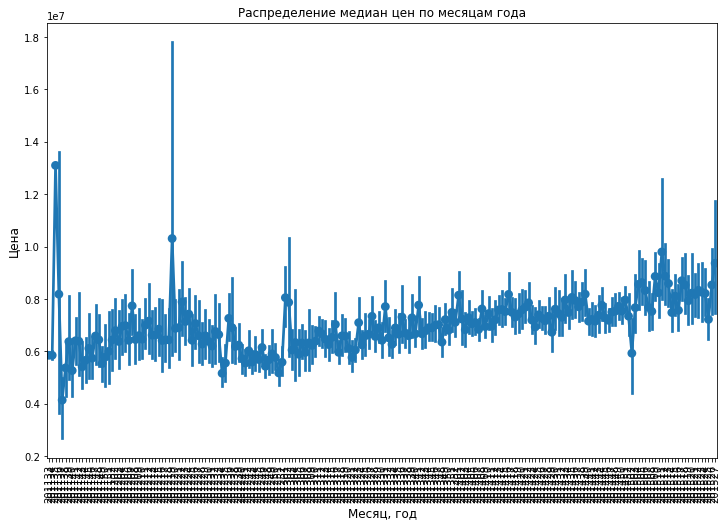

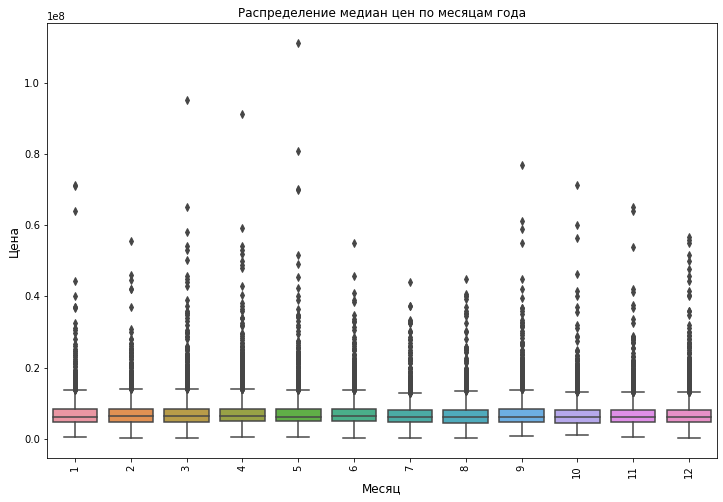

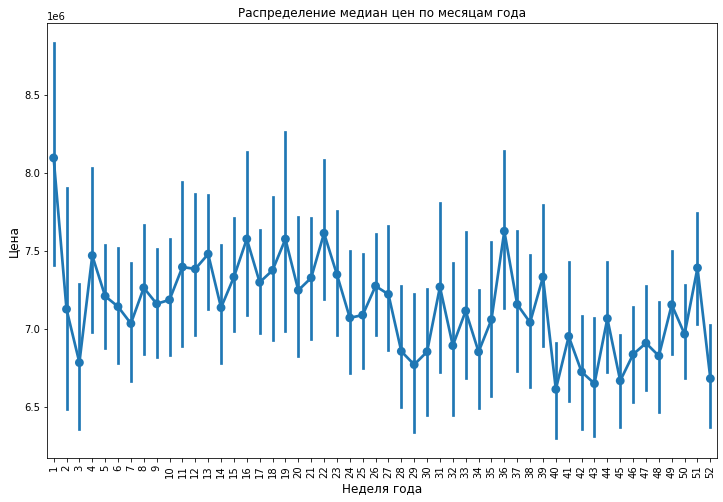

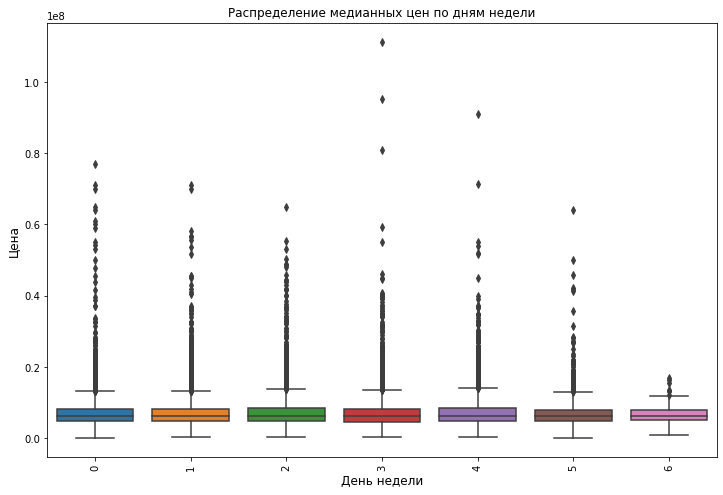

In [77]:
# Визуальзируем цены в зависимости от месяца, недели, года, дня и.т.д.
# year and month https://pandas.pydata.org/pandas-docs/stable/reference/index.html#
X_train["yearmonth"] = X_train["timestamp"].dt.year*100 + X_train["timestamp"].dt.month
X_test["yearmonth"] = X_test["timestamp"].dt.year*100 + X_test["timestamp"].dt.month

# year and week #
X_train["yearweek"] = X_train["timestamp"].dt.year*100 + X_train["timestamp"].dt.weekofyear
X_test["yearweek"] = X_test["timestamp"].dt.year*100 + X_test["timestamp"].dt.weekofyear

# year #
X_train["year"] = X_train["timestamp"].dt.year
X_test["year"] = X_test["timestamp"].dt.year

# month of year #
X_train["month_of_year"] = X_train["timestamp"].dt.month
X_test["month_of_year"] = X_test["timestamp"].dt.month

# week of year #
X_train["week_of_year"] = X_train["timestamp"].dt.weekofyear
X_test["week_of_year"] = X_test["timestamp"].dt.weekofyear

# day of week #
X_train["day_of_week"] = X_train["timestamp"].dt.weekday
X_test["day_of_week"] = X_test["timestamp"].dt.weekday


plt.figure(figsize=(12,8))
sns.pointplot(x='yearweek', y=y_train, data=X_train)
plt.ylabel('Цена', fontsize=12)
plt.xlabel('Месяц, год', fontsize=12)
plt.title('Распределение медиан цен по месяцам года')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='month_of_year', y=y_train, data=X_train)
plt.ylabel('Цена', fontsize=12)
plt.xlabel('Месяц', fontsize=12)
plt.title('Распределение медиан цен по месяцам года')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(12,8))
sns.pointplot(x='week_of_year', y=y_train, data=X_train)
plt.ylabel('Цена', fontsize=12)
plt.xlabel('Неделя года', fontsize=12)
plt.title('Распределение медиан цен по месяцам года')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='day_of_week', y=y_train, data=X_train)
plt.ylabel('Цена', fontsize=12)
plt.xlabel('День недели', fontsize=12)
plt.title('Распределение медианных цен по дням недели')
plt.xticks(rotation='vertical')
plt.show()

In [78]:
for f in X_train.columns:
    if X_train[f].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(X_train[f].values))
        X_train[f] = lbl.transform(list(X_train[f].values))

In [79]:
# Перейдем к обучению модели с помощью граиентного бустинга
import xgboost as xgb
if X_train[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_df[f].values)) 
        X_train[f] = lbl.transform(list(X_train[f].values))
        
X_train = X_train.drop(["id", "timestamp"], axis=1)

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(X_train, y_train, feature_names=X_train.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

[20:46:29] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[20:46:29] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




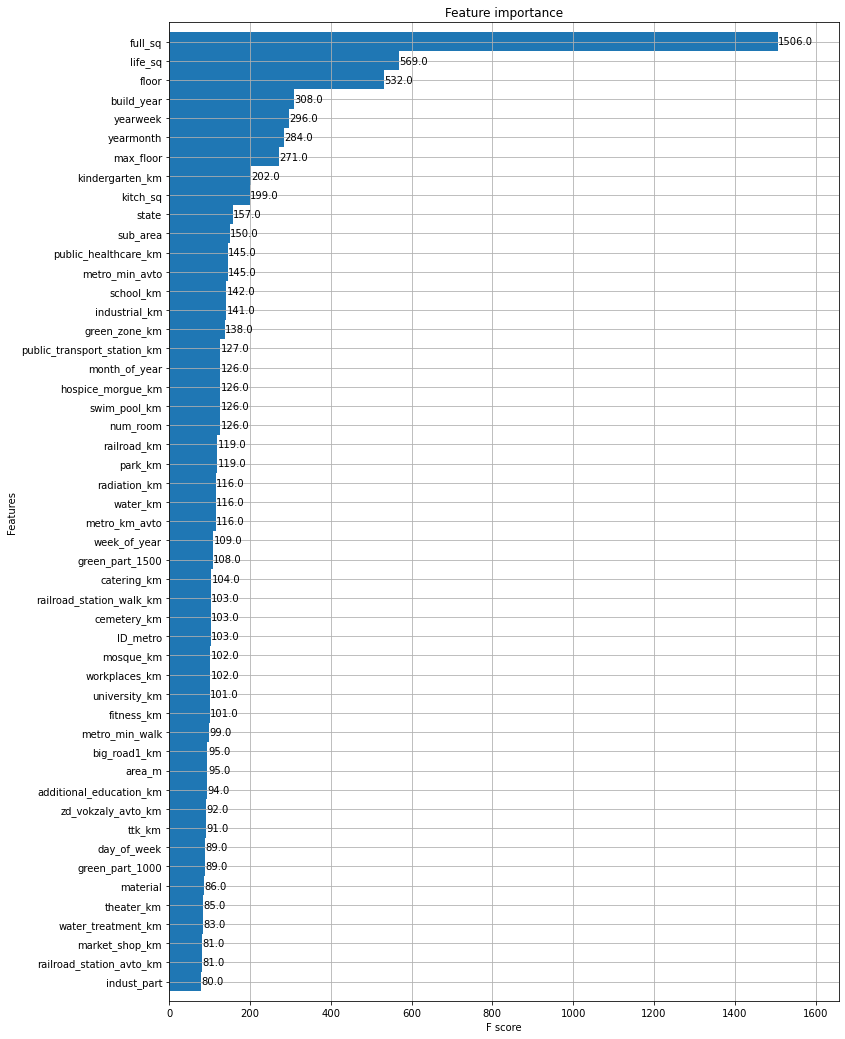

In [80]:
# Важные характеристики выведем на графике
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=1, ax=ax)
plt.show()

In [81]:
#   Так как метрика "RMSLE", используем логарифмированную целевую переменную для построения модели, а не фактическую.ё
# Посмотрим как изменятся важные показатели.
X_test = X_test.drop(["id", "timestamp"], axis=1)

xgb_params = {
    'eta': 0.05,
    'max_depth': 4,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'min_child_weight':1,
    'silent': 1,
    'seed':0
}

xgtrain = xgb.DMatrix(X_train, y_train, feature_names=X_train.columns)
xgtest = xgb.DMatrix(X_test, y_test, feature_names=X_test.columns)
watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
num_rounds = 100 # Increase the number of rounds while running in local
model = xgb.train(xgb_params, xgtrain, num_rounds, watchlist, early_stopping_rounds=50, verbose_eval=5)

[20:46:42] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[20:46:42] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-rmse:8239194.50000	test-rmse:7974905.50000
[5]	train-rmse:6724621.00000	test-rmse:6497213.50000
[10]	train-rmse:5564231.50000	test-rmse:5383674.00000
[15]	train-rmse:4715911.00000	test-rmse:4574404.50000
[20]	train-rmse:4100019.25000	test-rmse:3988691.00000
[25]	train-rmse:3660128.75000	test-rmse:3578201.75000
[30]	train-rmse:3356065.50000	test-rmse:3293251.25000
[35]	train-rmse:3141613.25000	test-rmse:3109690.50000
[40]	train-rmse:2983288.00000	test-rmse:2974711.50000
[45]	train-rmse:2864225.50000	test-rmse:

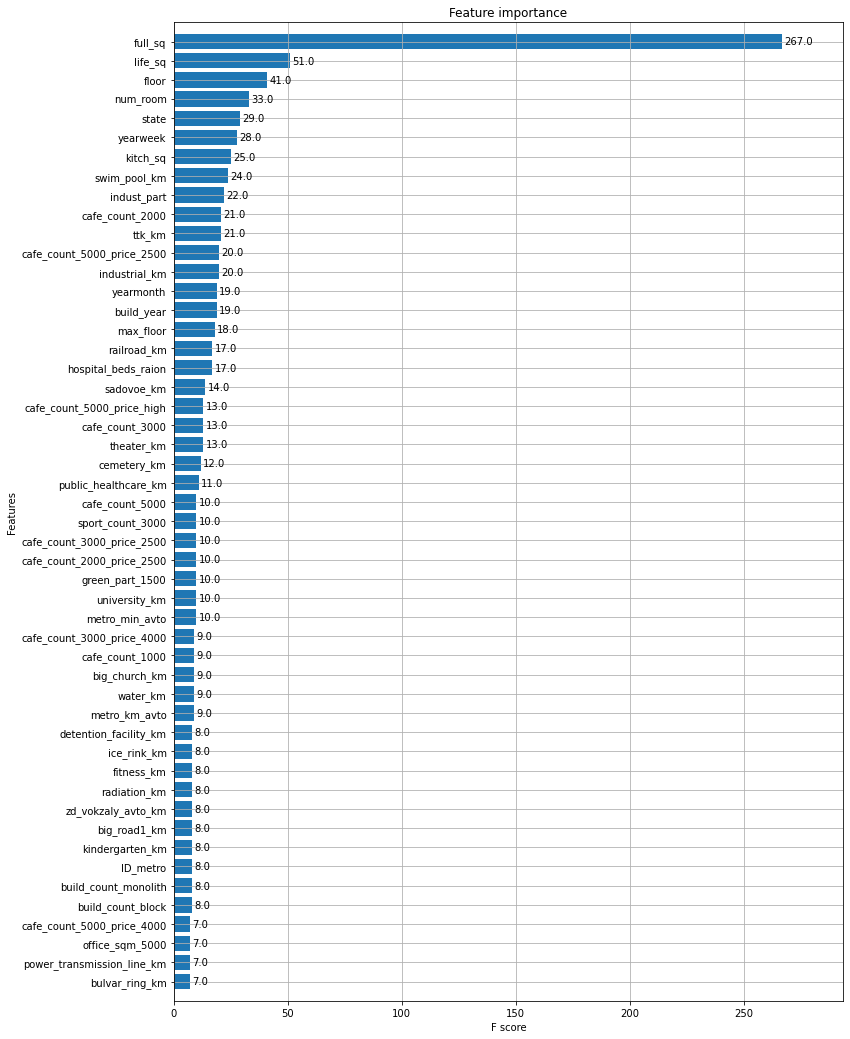

In [82]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [83]:
y_predict = model.predict(xgtrain)
output = pd.DataFrame({ 'price_doc': y_predict})
output.head()

,price_doc
0,4544197.0
1,16963366.0
2,7433814.0
3,7543099.5
4,5245788.0
